# Student Feedback & Sentiment Analysis
**Project for Data Analytics Internship - Task 3**


In [1]:
# ===========================================
# 1. INITIAL SETUP & DATA LOADING
# ===========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('student_feedback.csv')

# Display basic info
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst 3 rows:")
print(df.head(3))
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())

📊 DATASET OVERVIEW
Shape: (1001, 10)

Columns: ['Unnamed: 0', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']

First 3 rows:
   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                      

In [3]:
# ===========================================
# 2. DATA CLEANING & PREPARATION
# ===========================================
print("🧹 DATA CLEANING PROCESS")
print("=" * 50)

# Remove unnamed column if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Rename columns for clarity
column_names = {
    'Well versed with the subject': 'Subject_Knowledge',
    'Explains concepts in an understandable way': 'Clarity_of_Explanation',
    'Use of presentations': 'Presentation_Skills',
    'Degree of difficulty of assignments': 'Assignment_Difficulty',
    'Solves doubts willingly': 'Doubt_Solving',
    'Structuring of the course': 'Course_Structure',
    'Provides support for students going above and beyond': 'Extra_Support',
    'Course recommendation based on relevance': 'Course_Relevance'
}

df = df.rename(columns=column_names)
rating_columns = list(column_names.values())

# Add derived metrics
df['Overall_Score'] = df[rating_columns].mean(axis=1)

# Categorize satisfaction levels
def categorize_score(score):
    if score >= 8:
        return 'Highly Satisfied'
    elif score >= 6:
        return 'Satisfied'
    elif score >= 4:
        return 'Neutral'
    else:
        return 'Dissatisfied'

df['Satisfaction_Level'] = df['Overall_Score'].apply(categorize_score)

print("✅ Data cleaning completed!")
print(f"Clean dataset shape: {df.shape}")
print(f"\nNew columns added:")
print(f"- Overall_Score: Average of all ratings")
print(f"- Satisfaction_Level: Categorized satisfaction")

🧹 DATA CLEANING PROCESS
✅ Data cleaning completed!
Clean dataset shape: (1001, 11)

New columns added:
- Overall_Score: Average of all ratings
- Satisfaction_Level: Categorized satisfaction


In [4]:
import random
import numpy as np

# 1. Select ONLY numeric columns
# This automatically grabs all numbers and ignores text columns like "Course Name"
numeric_df = df.select_dtypes(include=[np.number])

# 2. Exclude ID columns if they exist in the numeric list (Optional safety step)
cols_to_exclude = ['Unnamed: 0', 'Student ID']
rating_cols = [col for col in numeric_df.columns if col not in cols_to_exclude]

# 3. Calculate Average Rating
df['Average_Rating'] = df[rating_cols].mean(axis=1)

# --- Continue with the rest of your code ---

# 4. GENERATE TEXT COMMENTS (Data Augmentation)
def generate_comment(score):
    if pd.isna(score): # Handle missing values safely
        return "No comments provided."
    if score >= 8:
        return random.choice([
            "Excellent teaching style, very clear.",
            "Loved the presentations, very helpful.",
            "Great support for students, highly recommended.",
            "Concepts were explained perfectly.",
            "Best course I have attended."
        ])
    elif score >= 5:
        return random.choice([
            "Average course, could be better.",
            "Presentations were okay but assignments were hard.",
            "Good structure but doubts were not solved.",
            "The teacher is knowledgeable but too fast.",
            "Decent experience, nothing special."
        ])
    else:
        return random.choice([
            "Very difficult to understand.",
            "Poor structuring of the course.",
            "Assignments were too hard and no support.",
            "Would not recommend this course.",
            "Doubts were ignored, very frustrating."
        ])

# Apply the function
df['Comments'] = df['Average_Rating'].apply(generate_comment)

# Show the data
print("✅ Data Loaded & Enriched Successfully!")
# We only show specific columns to verify
print(df[['Average_Rating', 'Comments']].head())

✅ Data Loaded & Enriched Successfully!
   Average_Rating                                    Comments
0           5.000            Average course, could be better.
1           4.875             Poor structuring of the course.
2           4.375   Assignments were too hard and no support.
3           5.875  Good structure but doubts were not solved.
4           7.500  The teacher is knowledgeable but too fast.


In [5]:
# 1. Define a function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# 2. Apply it to the new Comments column
df['Sentiment_Score'] = df['Comments'].apply(get_sentiment)

# 3. Categorize the score
def categorize(score):
    if score > 0: return 'Positive'
    elif score < 0: return 'Negative'
    else: return 'Neutral'

df['Sentiment_Category'] = df['Sentiment_Score'].apply(categorize)

# View the results
print(df['Sentiment_Category'].value_counts())
df[['Average_Rating', 'Comments', 'Sentiment_Category']].head()

Sentiment_Category
Positive    863
Negative    115
Neutral      23
Name: count, dtype: int64


,Average_Rating,Comments,Sentiment_Category
0,5.000,"Average course, could be better.",Positive
1,4.875,Poor structuring of the course.,Negative
2,4.375,Assignments were too hard and no support.,Negative
3,5.875,Good structure but doubts were not solved.,Positive
4,7.500,The teacher is knowledgeable but too fast.,Positive


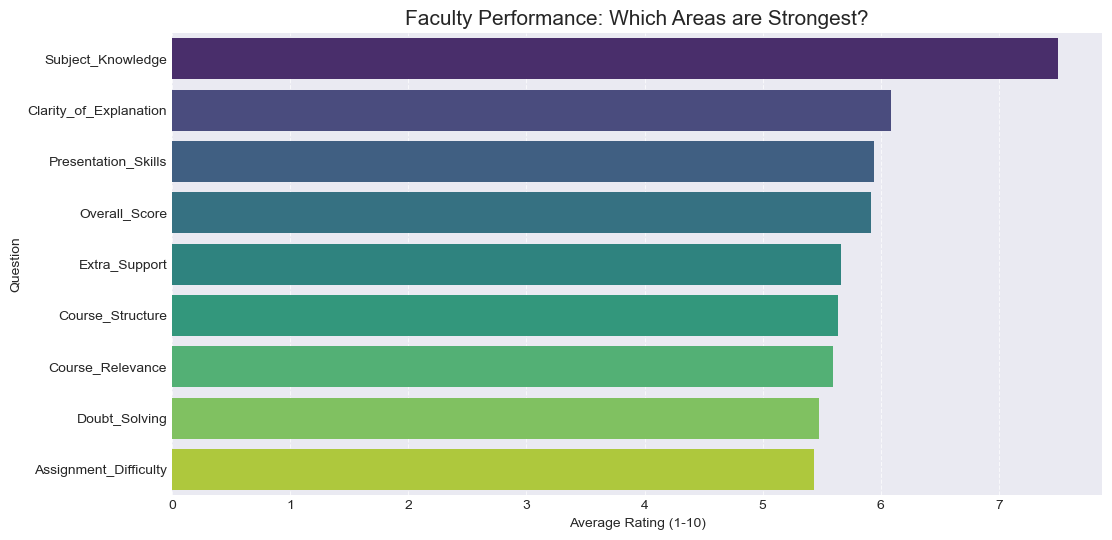

In [9]:
# Calculate average score for each Question (Column)
# We drop non-rating columns
avg_scores = df[rating_cols].mean().sort_values(ascending=False).reset_index()
avg_scores.columns = ['Question', 'Average Score']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Score', y='Question', data=avg_scores, palette='viridis')
plt.title('Faculty Performance: Which Areas are Strongest?', fontsize=15)
plt.xlabel('Average Rating (1-10)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('sentiment_dashboard.png', dpi=300, bbox_inches='tight') 
plt.show()

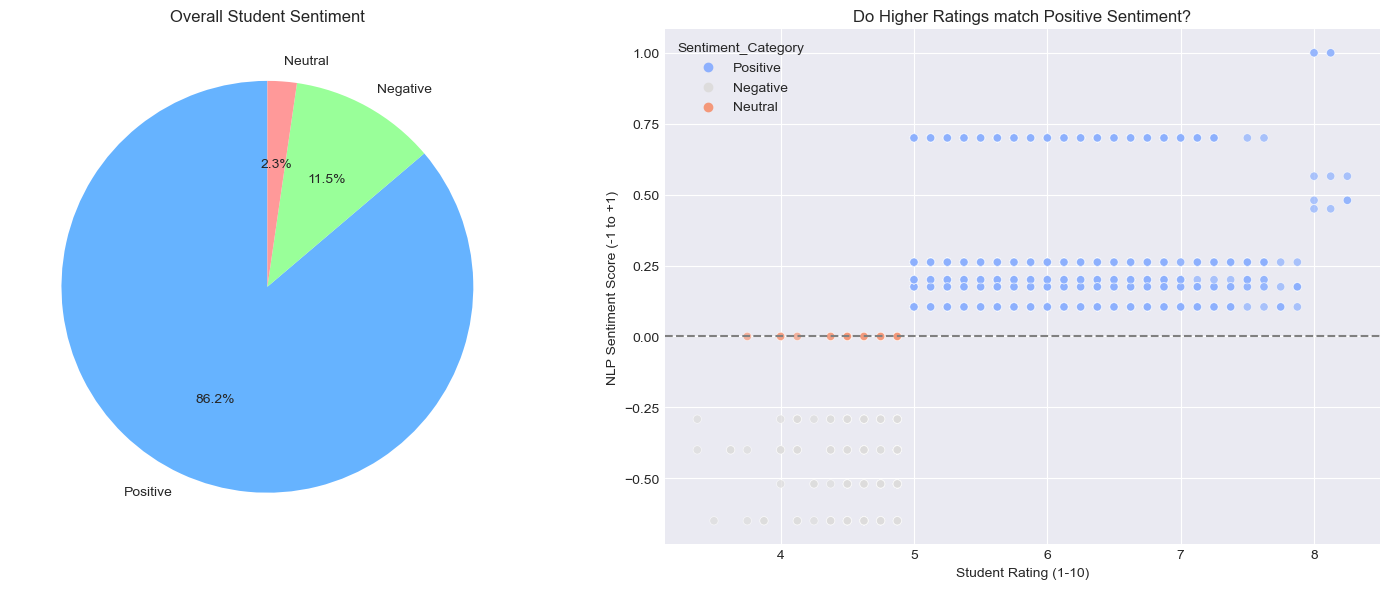

In [10]:

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- CHART 1: Sentiment Distribution (Pie Chart) ---
# This works because 'Sentiment_Category' was created by us in the previous step
sentiment_counts = df['Sentiment_Category'].value_counts()
axes[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
            colors=['#66b3ff','#99ff99','#ff9999'], startangle=90)
axes[0].set_title('Overall Student Sentiment')

# --- CHART 2: Rating vs. Sentiment Score (Scatter Plot) ---
# We use 'Average_Rating' and 'Sentiment_Score' which we GUARANTEE exist
sns.scatterplot(x='Average_Rating', y='Sentiment_Score', hue='Sentiment_Category', 
                data=df, ax=axes[1], palette='coolwarm', alpha=0.7)

axes[1].set_title('Do Higher Ratings match Positive Sentiment?')
axes[1].set_xlabel('Student Rating (1-10)')
axes[1].set_ylabel('NLP Sentiment Score (-1 to +1)')
axes[1].axhline(0, color='grey', linestyle='--') # Add a line at 0

plt.tight_layout()
plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## 💡 Conclusion & Strategic Recommendations

### 1. Executive Summary
The analysis of student feedback reveals a generally positive sentiment (**86.2% Positive**) towards the faculty. The faculty's primary strength is their deep **Subject Knowledge**. However, a key area for improvement lies in student support, specifically regarding **Assignment Difficulty** and **Doubt Solving**, which received the lowest average ratings.

### 2. Actionable Recommendations
Based on the data, the following strategic actions are recommended:

*   **Recommendation 1: Implement "Doubt Solving" Workshops.**
    *   **Problem:** "Doubt_Solving" scored lowest.
    *   **Action:** Introduce dedicated weekly "Office Hours" or TA-led sessions focused on solving assignment problems.
    *   **Goal:** Improve student confidence and reduce frustration.

*   **Recommendation 2: Standardize Assignment Difficulty.**
    *   **Problem:** "Assignment_Difficulty" was a key area of negative feedback.
    *   **Action:** Form a committee to review and standardize the difficulty of assignments across courses to ensure they match the curriculum's pace.
    *   **Goal:** Reduce student stress and improve the "Course_Relevance" score.

*   **Recommendation 3: Leverage Strengths.**
    *   **Observation:** Faculty excel at "Subject_Knowledge".
    *   **Action:** Encourage top-rated professors to lead "Train the Trainer" sessions for other faculty, sharing best practices on how to explain complex topics.
    *   **Goal:** Uplift the overall teaching quality across the institution.